### LIF

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylustrator
from numpy import genfromtxt
import matplotlib.cm as cm
from scipy.signal import savgol_filter

cmap = ['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e', '#5ac3be']
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 7

mm=1/25.4
lw = 1
ms = 3

In [4]:
ions = genfromtxt('ions.csv', delimiter=',')
ions = ions[432:529]
ions = ions.transpose()

ions = ions[323:420]
ions = ions.transpose()
ions = ions/ions.max()

ions_sp_h = savgol_filter(ions[48],10,2)
ions_sp_v = savgol_filter(ions.transpose()[47],10,2)

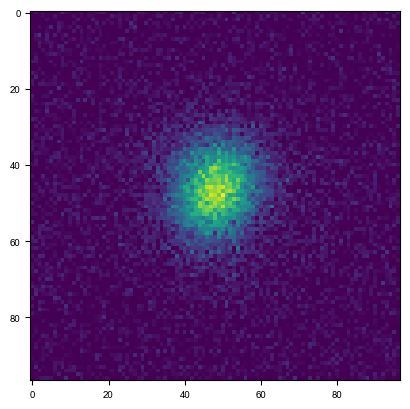

In [5]:
plt.imshow(ions)
plt.show()

In [6]:
x_dim = ions.shape[0]
y_dim = ions.shape[1]
x, y = np.linspace(0,x_dim-1,x_dim), np.linspace(0,y_dim-1,y_dim)
xgrid, ygrid = np.meshgrid(y, x)
levels = np.linspace(0,1,30)

/tmp/ipykernel_50409/460180512.py:4: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for c in CS.collections:


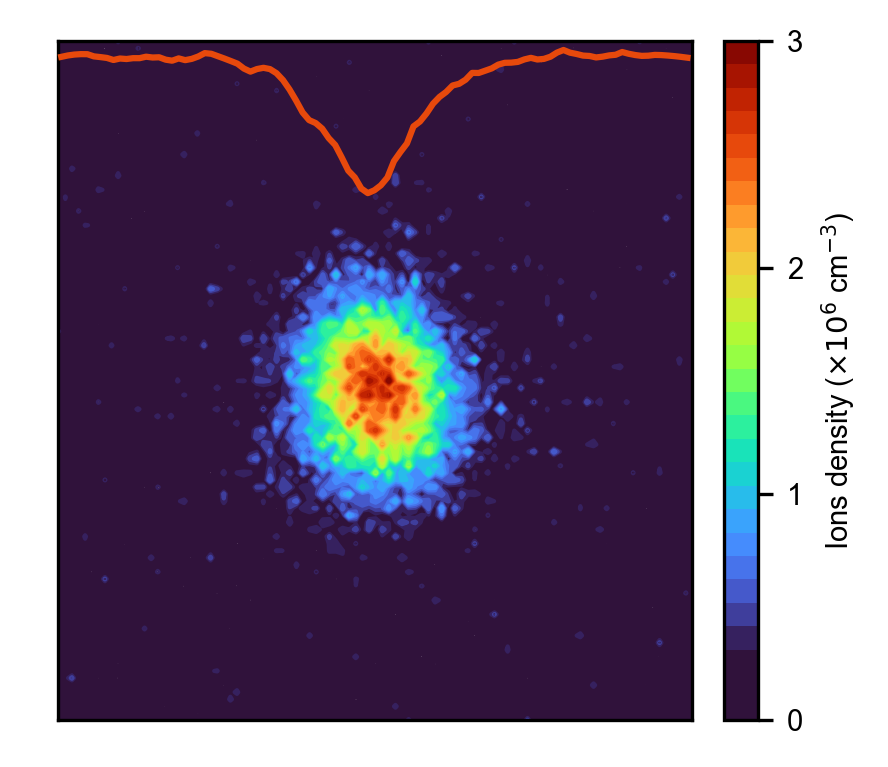

In [8]:
%matplotlib inline
fig, ax1 = plt.subplots(figsize=(70*mm, 62*mm), layout='constrained', dpi=300)
CS = ax1.contourf(xgrid,ygrid, ions, 10, levels=levels,cmap='turbo', vmin=0.1,vmax=1)
for c in CS.collections:
    c.set_edgecolor("face")
cbar = fig.colorbar(CS, ticks=[0, 0.333, 0.666, 1])
cbar.ax.set_yticklabels(['0', '1', '2', '3'], fontsize=7)
cbar.ax.set_ylabel(r'Ions density ($\times10^6$ cm$^{-3}$)', fontsize=7)

ax1.set_xticks([]); ax1.set_yticks([]);

left, bottom, width, height = [-0.019, 0.75, 0.833, 0.215]
axin = fig.add_axes([left, bottom, width, height])
axin.plot(-ions_sp_h, c='#e7490c')
axin.set_xticks([]); axin.set_yticks([]);
axin.set_axis_off()

plt.savefig('fig1c.pdf', format='pdf', transparent=True)
plt.show()